<h1><center> Predict the onset of diabetes based on diagnostic measures through Machine Learning <h1>

                                                                                                     - Avinash Monteiro

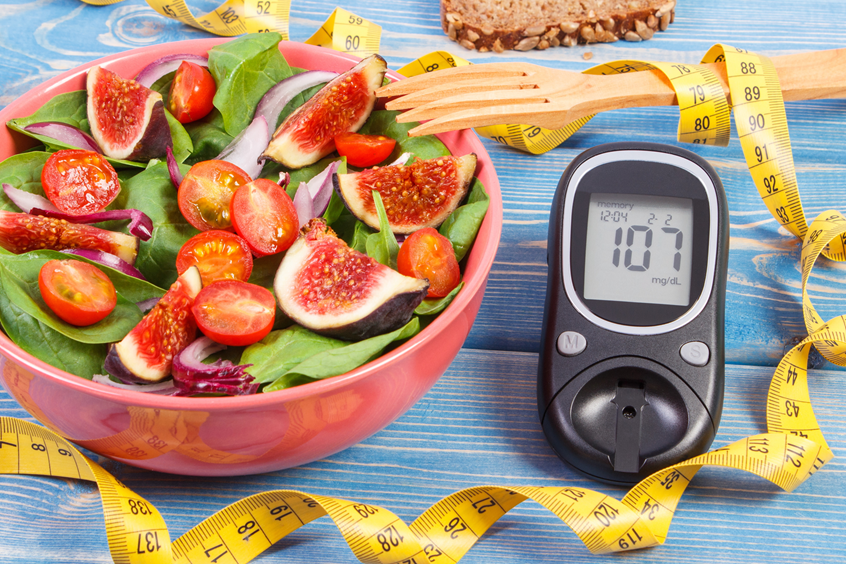

# Table of Contents

1. [Introduction](#section1)<br>

<a id=section1></a>
# 1. Introduction



Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin a  hormone made by the  pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Over time, having too much glucose in your blood can cause  health problems. Although diabetes has no cure, you can take steps to  manage your diabetes and stay healthy.

Sometimes people call diabetes “a touch of sugar” or “borderline diabetes.” These terms suggest that someone doesn’t really have diabetes or has a less serious case, but every case of diabetes is serious.

![Diabetes monitor with fruits and vegetables](https://www.niddk.nih.gov/-/media/Images/Health-Information/Diabetes/diabetes-monitor-fruits-vegetables-small_597x347.png)

Diabetes affects just about everyone, from the over 110 million Americans with or at risk for the disease to the many more people who care for them.

## What are the different types of diabetes?

The most common types of diabetes are type 1, type 2, and gestational diabetes.

### Type 1 diabetes

If you have  type 1 diabetes, your body does not make insulin. Your  immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

### Type 2 diabetes

If you have  type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

### Gestational diabetes

Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

### Other types of diabetes

Less common types include  monogenic diabetes which is an inherited form of diabetes, and  cystic fibrosis-related diabetes. 

## How common is diabetes?

As of 2015, 30.3 million people in the United States, or 9.4 percent of the population, had diabetes. More than 1 in 4 of them didn’t know they had the disease. Diabetes affects 1 in 4 people over the age of 65. About 90-95 percent of cases in adults are type 2 diabetes.1

## Who is more likely to develop type 2 diabetes?

You are more likely to develop type 2 diabetes if you are age 45 or older, have a family history of diabetes, or are overweight. Physical inactivity, race, and certain health problems such as high blood pressure also affect your chance of developing type 2 diabetes. You are also more likely to develop type 2 diabetes if you have  pre-diabetes or had gestational diabetes when you were pregnant.

## What health problems can people with diabetes develop?

Over time, high blood glucose leads to problems such as

-   heart disease
-   stroke
-   kidney disease
-   eye problems
-   dental disease
-   nerve damage
-   foot problems

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## 2. Importing Important Libraries

In [1]:
import numpy as np # for carrying out calculations
import pandas as pd # for essential data frame functions

In [2]:
import matplotlib.pyplot as plt # for visualizations
%matplotlib inline 
import seaborn as sns # for visualize

import warnings
warnings.filterwarnings('ignore') #to not show any irrelevant warnings

In [3]:
from pandas_profiling import ProfileReport # for EDA

## 3. Import Dataset and Checking for ``info()``

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/Avinash-Monteiro/Datasets/master/pima-data-diabetes.csv')
#df=pd.read_csv('pima-data-diabetes.csv')
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.info() #Checking for missing values, anamolies etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [6]:
df.describe() #checking the distribution

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [7]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

- The dataset consists of 10 features and it doesn't have any missing values 

## 4. Description of the dataset

<p>As mentioned above we are going to use <b>'Pima Indians Diabetes Database'</b> from Kaggle Brief understanding of the dataset is as below:</p>

<p>There are <b>768 observations and 9 features</b> in the dataset where each row represent a pesron. Small deatils about each feature is written below:</p>

* **Pregnancies (Numerical):** It contains the count of how many times women have been pregnant.
* **Glucose (Numerical):** It contains the level of glucose in an individual body.
* **Blood Pressure (Numerical):** It contains an individual measurement of blood pressure.
* **SkinThickness (Numerical):** It contains an individual measurement of skin thickness.
* **Insulin (Numerical):** It contains the level of insulin in an individual body.
* **BMI (Numerical):** It contains the measurement of body mass index in an individual body.
* **DiabetesPedigreeFunction (Numerical):** It contains a measure that is based on A function which scores the likelihood of diabetes based on family history. It provides some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to an individual.
* **Age (Numerical):** It contains the age of an individual.
* **Outcome (Categorical Nominal):** Target column which specifies whether an individual has diabetes or not. False means the individual is not diabetic and True means the individual is diabetic.

## 5. Exploratory data analysis

### 5.1 Carrying out Pandas Profiling to check for duplicate values


In [8]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=False)

In [9]:
profile.to_file("Profile_Report.html")

From pandas profiling we didnt observe any duplicate values but we observed lot of zero values in the data which are shown as under

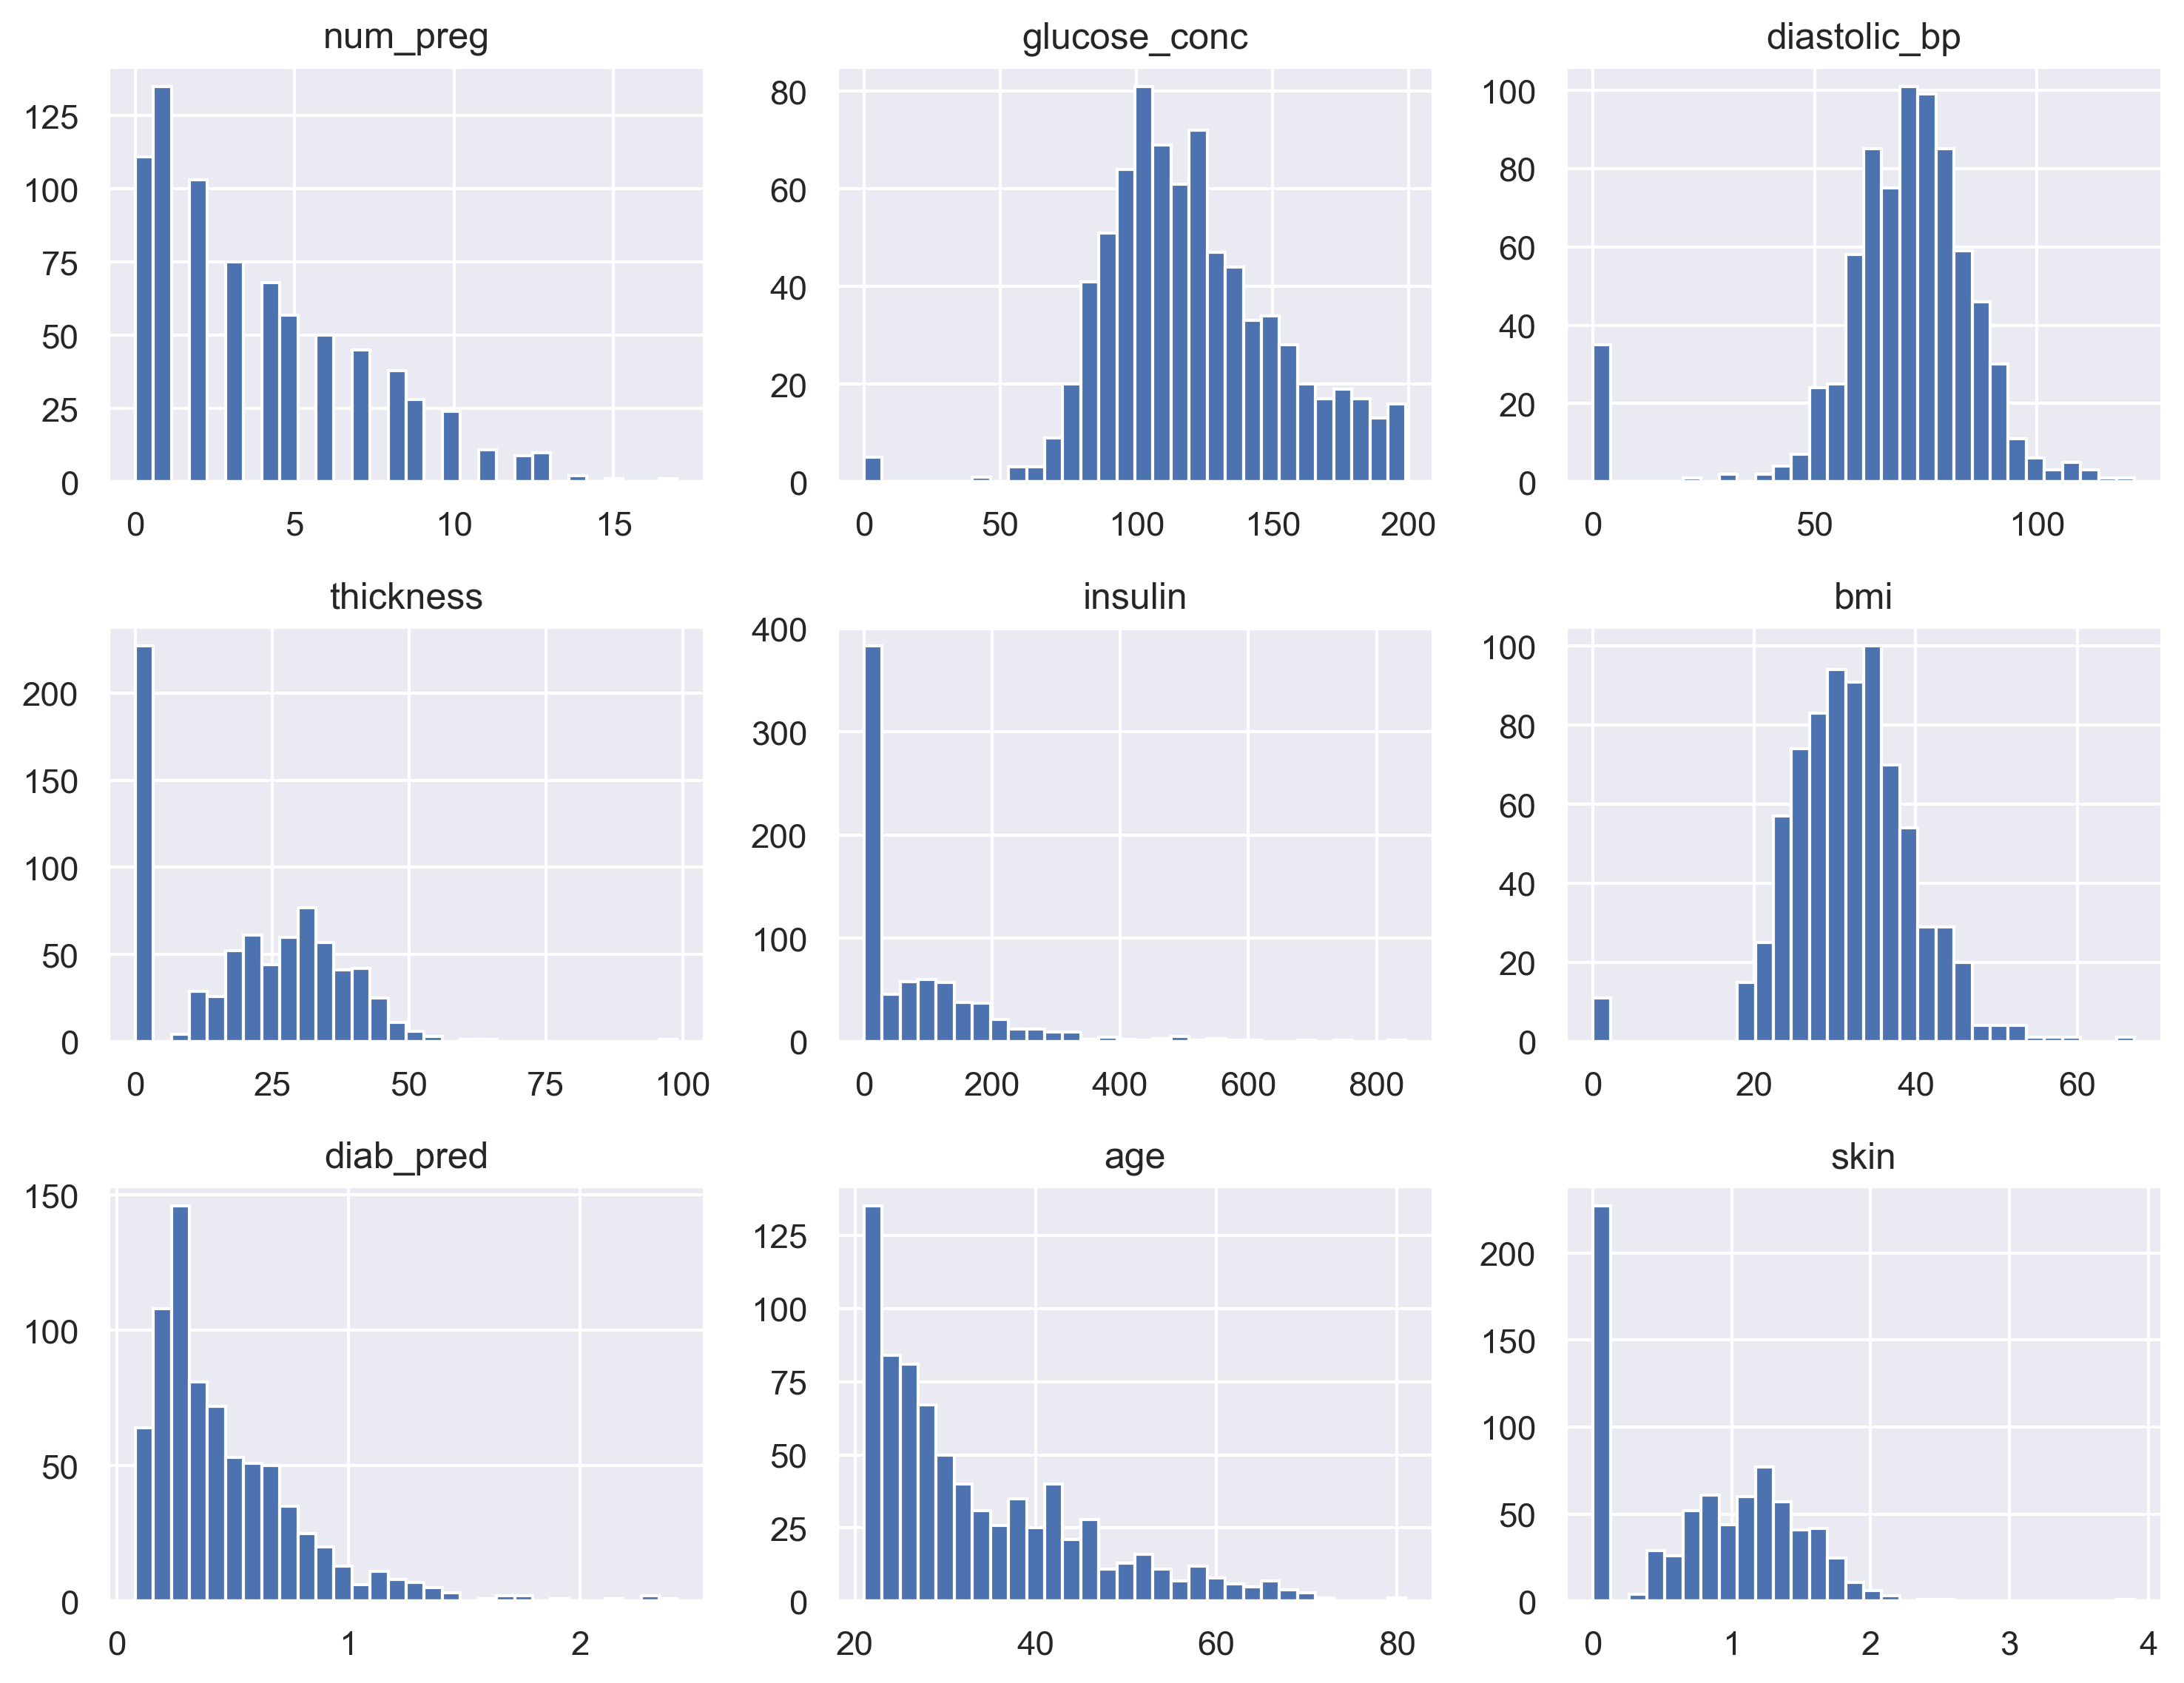

In [10]:
columns=list(df.columns)

sns.set(style="darkgrid", color_codes=True,font_scale=1,)
plt.figure(figsize=(10,10), dpi=300)
i=1
while i<=9:
    plt.subplot(4,3,i,)
    plt.hist(df[columns[i-1]], bins=30)
    plt.title(columns[i-1])
    plt.tight_layout()
    i+=1

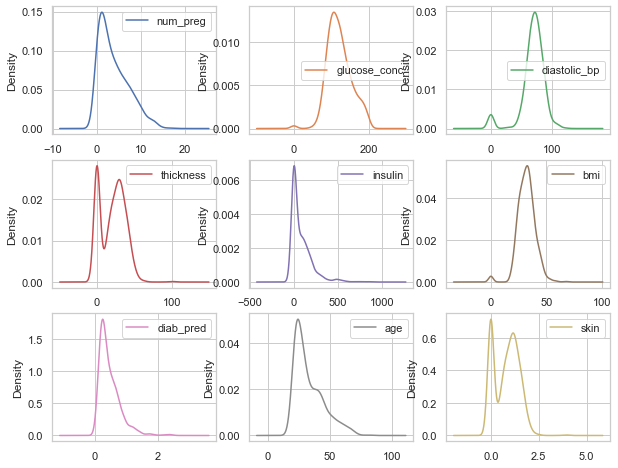

In [11]:
columns=list(df.columns)
sns.set(style="whitegrid", font_scale=1, color_codes=True)
df[columns].plot(kind='kde', subplots=True, layout=(3,3),sharex=False,figsize=(10,8))
#plt.tight_layout()
plt.show()

**Summary and actions**
- 

From Pandas_profiling and also from the above hist & kde plots, we noticed the following points;
- Every column has many zero values. we are ignoring them for now and touch them if the ML model is not very reliable
- skin and thickness columns are very highly co-related. After examinign the columns we notice that the values are one and the same except both the columns are in different scales. let us drop one column for our analysis.
- **The insulin level column has 50% 0 values. We will drop them as 50% of the data is zero.**

In [12]:
df=df.drop(columns=['skin', 'insulin'])

### 5.2 Updating the 0 values with mean based on target valiable value

In [13]:
print(round(df[df['diabetes']==True]['glucose_conc'].mean()))
print(round(df[df['diabetes']==False]['glucose_conc'].mean()))

141
110


You can see from above man values that each class has its own mean value. Therefore, replacing all the 0 values to the column's mean value will not make sense. We need to apply smarter methods as shown under

In [14]:
print(list(df[(df['glucose_conc']==0) & (df['diabetes']==True)]['glucose_conc'].index))
print(list(df[(df['glucose_conc']==0) & (df['diabetes']==False)]['glucose_conc'].index))

[349, 502]
[75, 182, 342]


In [15]:
l=list(df[(df['glucose_conc']==0) & (df['diabetes']==True)]['glucose_conc'].index)
df['glucose_conc'].iloc[l]=round(df[df['diabetes']==True]['glucose_conc'].mean())
l=list(df[(df['glucose_conc']==0) & (df['diabetes']==False)]['glucose_conc'].index)
df['glucose_conc'].iloc[l]=round(df[df['diabetes']==False]['glucose_conc'].mean())


l=df[(df['diastolic_bp']==0) & (df['diabetes']==True)]['diastolic_bp'].index
df['diastolic_bp'].iloc[l]=round(df[df['diabetes']==True]['diastolic_bp'].mean())
l=list(df[(df['diastolic_bp']==0) & (df['diabetes']==False)]['diastolic_bp'].index)
df['diastolic_bp'].iloc[l]=round(df[df['diabetes']==False]['diastolic_bp'].mean())

l=df[(df['thickness']==0) & (df['diabetes']==True)]['thickness'].index
df['thickness'].iloc[l]=round(df[df['diabetes']==True]['thickness'].mean())
l=list(df[(df['thickness']==0) & (df['diabetes']==False)]['thickness'].index)
df['thickness'].iloc[l]=round(df[df['diabetes']==False]['thickness'].mean())


l=df[(df['bmi']==0) & (df['diabetes']==True)]['bmi'].index
df['bmi'].iloc[l]=round(df[df['diabetes']==True]['bmi'].mean())
l=list(df[(df['bmi']==0) & (df['diabetes']==False)]['bmi'].index)
df['bmi'].iloc[l]=round(df[df['diabetes']==False]['bmi'].mean())


l=df[(df['age']==0) & (df['diabetes']==True)]['age'].index
df['age'].iloc[l]=round(df[df['diabetes']==True]['age'].mean())
l=list(df[(df['age']==0) & (df['diabetes']==False)]['age'].index)
df['age'].iloc[l]=round(df[df['diabetes']==False]['age'].mean())

### 5.3 Pandas profiling after Data Cleaning

In [16]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=False)
profile.to_file("Profile_Report after feature engg.html")

Now the data looks really clean !

### 5.4 Checking the distribution once again - Univariant Analysis

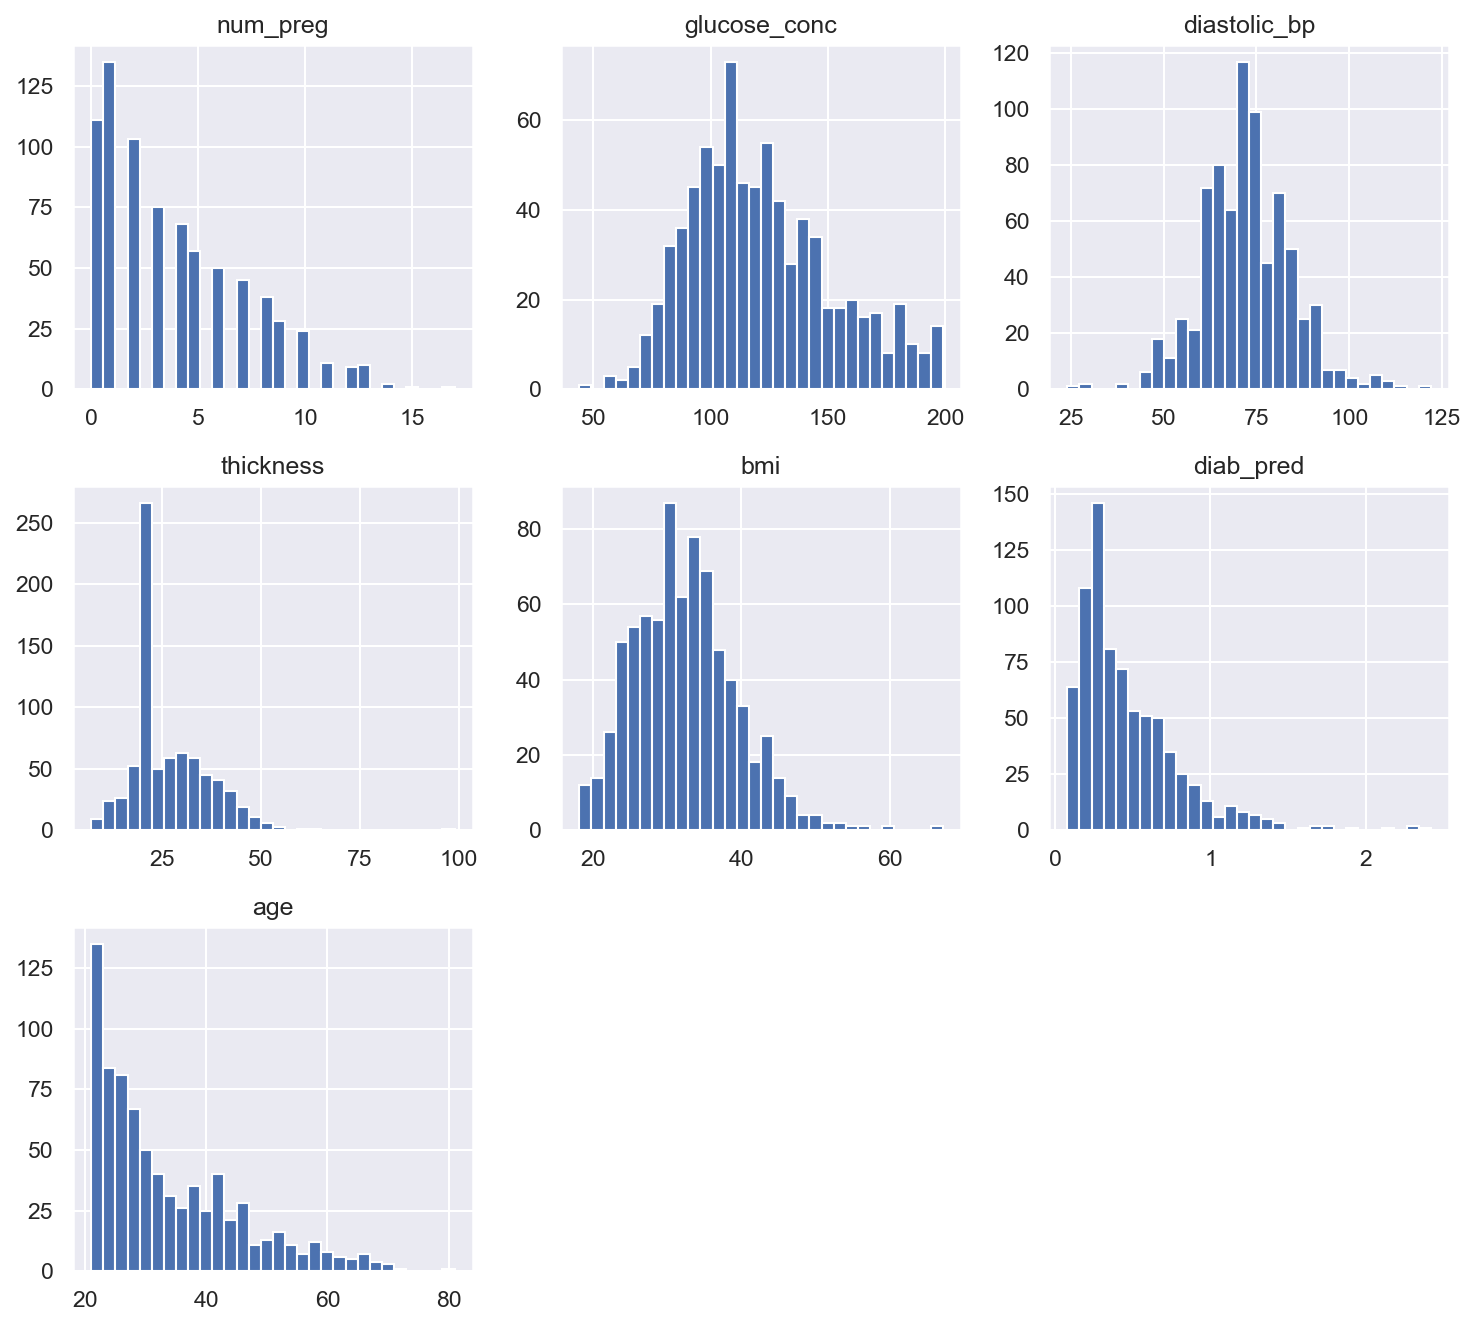

In [17]:
columns=list(df.columns)

sns.set(style="darkgrid", font_scale=1, color_codes=True)
plt.figure(figsize=(10,9), dpi=150)
i=1
while i<=7:
    plt.subplot(3,3,i,)
    plt.hist(df[columns[i-1]], bins=30)
    plt.title(columns[i-1])
    plt.tight_layout()
    i+=1

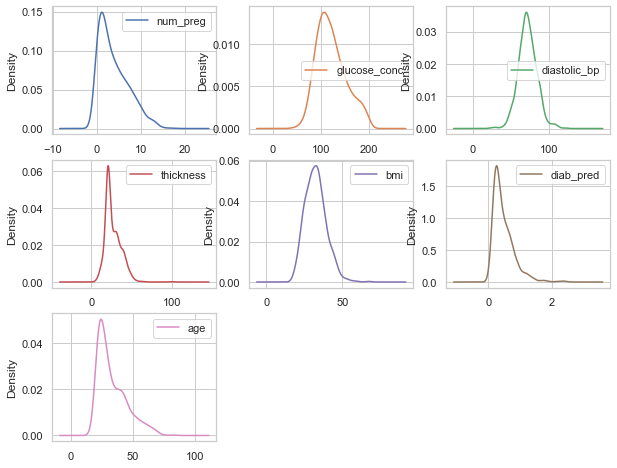

In [18]:
columns=list(df.columns)
sns.set(style="whitegrid", font_scale=1, color_codes=True)
df[columns].plot(kind='kde', subplots=True, layout=(3,3),sharex=False,figsize=(10,8))
#plt.tight_layout()
plt.show()

In [19]:
X=pd.DataFrame(data=df.drop(columns=['diabetes']), columns=df.drop(columns=['diabetes']).columns)
X.head()

,num_preg,glucose_conc,diastolic_bp,thickness,bmi,diab_pred,age
0,6,148,72,35,33.6,0.627,50
1,1,85,66,29,26.6,0.351,31
2,8,183,64,22,23.3,0.672,32
3,1,89,66,23,28.1,0.167,21
4,0,137,40,35,43.1,2.288,33


### 5.5 Feature Engineering on Target Variable column

In [20]:
df['label']=df['diabetes'].apply(lambda x:1 if x==True else 0)

In [21]:
y=pd.DataFrame(df['label'],)

In [22]:
y.head()

,label
0,1
1,0
2,1
3,0
4,1


### 5.6 Checking the distribution of target variable

In [23]:
y.value_counts()

label
0        500
1        268
dtype: int64

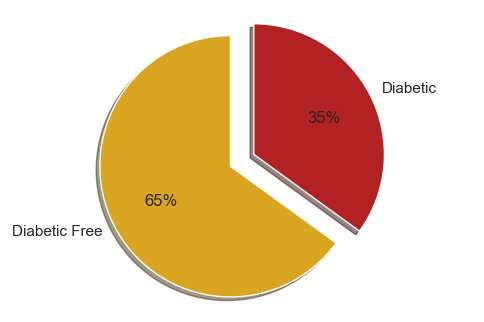

In [24]:
labels=['Diabetic Free', 'Diabetic']
sizes=[65,35]
explode=[0,0.2]
fig1, ax1 = plt.subplots(dpi=100)
ax1.pie(sizes, explode=explode, colors=['goldenrod','firebrick'],labels=labels, autopct='%1.0f%%',shadow=True, startangle=90,)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('TARGETVARIABLE.png', dpi=150)
plt.show()


Text(0, 0.5, 'Count')

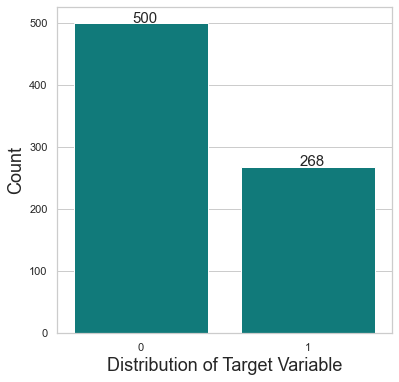

In [25]:
plt.figure(figsize=(6,6))
sns.set(style="whitegrid", font_scale=1, color_codes=True)
sns.countplot(y['label'], color='darkcyan')
plt.annotate(text='500', xy=(-0.05,500),fontsize=15 )
plt.annotate(text='268', xy=(0.95,270),fontsize=15 )
plt.xlabel('Distribution of Target Variable',fontsize=18)
plt.ylabel('Count',fontsize=18)

We can observe from the above plots that the daaset is not completely balanced.

### 5.7 Bivariant Analysis

<AxesSubplot:>

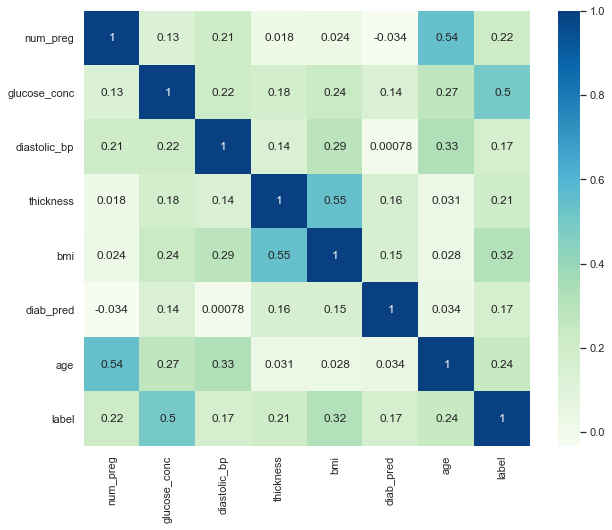

In [26]:
cor=df.drop(columns='diabetes').corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot =True, cmap='GnBu')

We can see that the features are independent and not correlated with each other

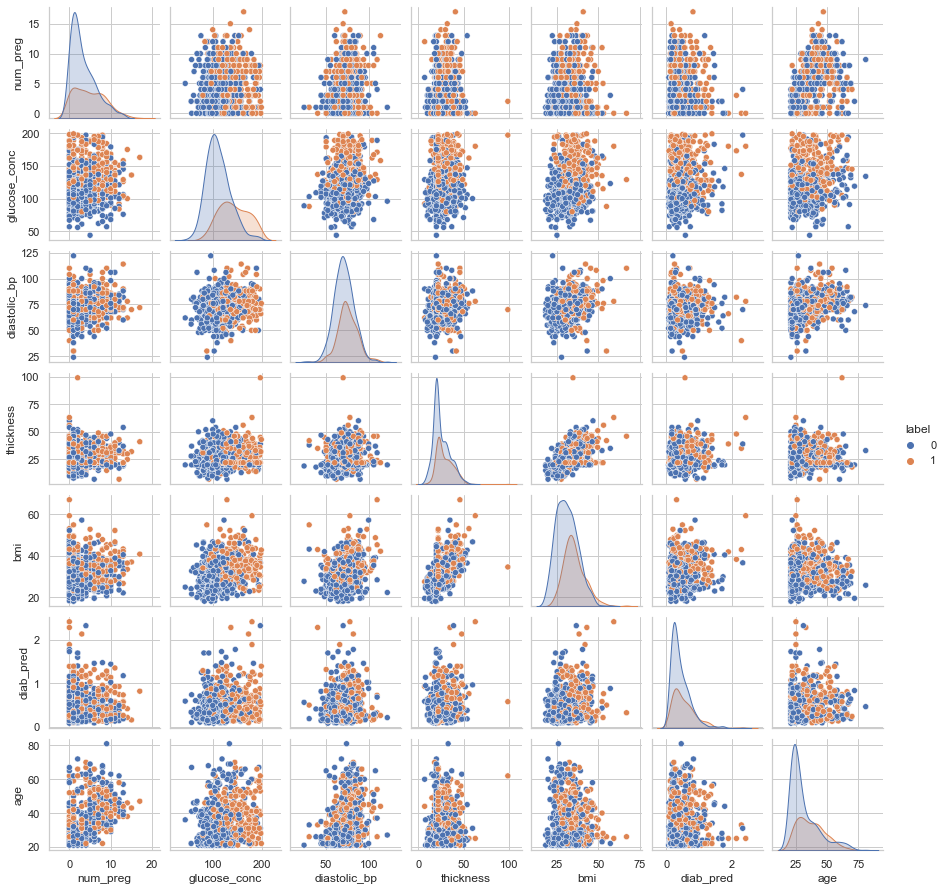

In [27]:
sns.pairplot(data=df.drop(columns=['diabetes']), height =1.8,hue='label')
plt.savefig('pairplot.png', dpi=150)

## 6. Train test Split

Let us split the dataset into 70:30 for our model development and testing

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=df['label'], random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_s=scale.fit_transform(X_train)

In [30]:
X_test_s=scale.transform(X_test)

In [31]:
X_train = pd.DataFrame(X_train_s, columns=X_train.columns)

In [32]:
X_train.shape

(537, 7)

In [33]:
X_test = pd.DataFrame(X_test_s, columns=X_test.columns)

In [34]:
X_test.shape

(231, 7)

## 7. Machine Learning

### 7.1 Basic ML Algorithms

First we shall apply the basic classification algorithms and check the performance of the models. 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report

#### Determining the model evaluation criteria

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width="500" height="460" />


From the above confusion matrix, we can deduce the following for our dataset:
- **False Positive,FP**: Actually the patient is not Diabetic but our model predicted it as Positive. There is no major loss in prediction and to avoid we can add another confirmator test for patients just to make sure.
- **False Negative, FN**: Here, the patient is actually Diabetic but the model predicted negative. This is very bad as many patients may go untreated. We must aim to reduce it.



In order to reduce False Negatives, let us aim for model with highest Recall Socre. The recall score is given by the formula as under;

<img src="https://anchormen.nl/wp-content/uploads/2020/02/recall-formula-768x160.png" />

As you can see from the above formula, if FN, reduce, the recall score increases and moved close to ideal condition of 1.

In [36]:
my_dict={} # defining an empty disctionary

logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train_lr=logreg.predict(X_train)
y_pred_test_lr=logreg.predict(X_test)

my_dict['Log Reg']=[recall_score(y_train, y_pred_train_lr),recall_score(y_test, y_pred_test_lr)]

#-----------------------------------------------------------------------------------------------------------------
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_train_dt=tree.predict(X_train)
y_pred_test_dt=tree.predict(X_test)

my_dict['Decision Tree']=[recall_score(y_train, y_pred_train_dt),recall_score(y_test, y_pred_test_dt)]

#-----------------------------------------------------------------------------------------------------------------
forest=RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_train_fr=forest.predict(X_train)
y_pred_test_fr=forest.predict(X_test)


my_dict['Random Forest']=[recall_score(y_train, y_pred_train_fr),recall_score(y_test, y_pred_test_fr)]


#-----------------------------------------------------------------------------------------------------------------
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_train_knn=knn.predict(X_train)
y_pred_test_knn=knn.predict(X_test)
my_dict['KNN Classifier']=[recall_score(y_train, y_pred_train_knn),recall_score(y_test, y_pred_test_knn)]

#-----------------------------------------------------------------------------------------------------------------
svm= SVC()
svm.fit(X_train, y_train)
y_pred_train_svm=svm.predict(X_train)
y_pred_test_svm=svm.predict(X_test)


my_dict['SVC']=[recall_score(y_train, y_pred_train_svm),recall_score(y_test, y_pred_test_svm)]

#-----------------------------------------------------------------------------------------------------------------
nb=GaussianNB() 
nb.fit(X_train, y_train)
y_pred_train_nb=nb.predict(X_train)
y_pred_test_nb=nb.predict(X_test)

my_dict['Naive Bayes']=[recall_score(y_train, y_pred_train_nb),recall_score(y_test, y_pred_test_nb)]

results=pd.DataFrame(data=my_dict.values(), columns=['Recall_Score_Train','Recall_Score_Test'], index=my_dict.keys())
results

,Recall_Score_Train,Recall_Score_Test
Log Reg,0.588235,0.518519
Decision Tree,1.000000,0.641975
Random Forest,1.000000,0.703704
KNN Classifier,0.705882,0.543210
SVC,0.652406,0.481481
Naive Bayes,0.631016,0.617284


### Summary

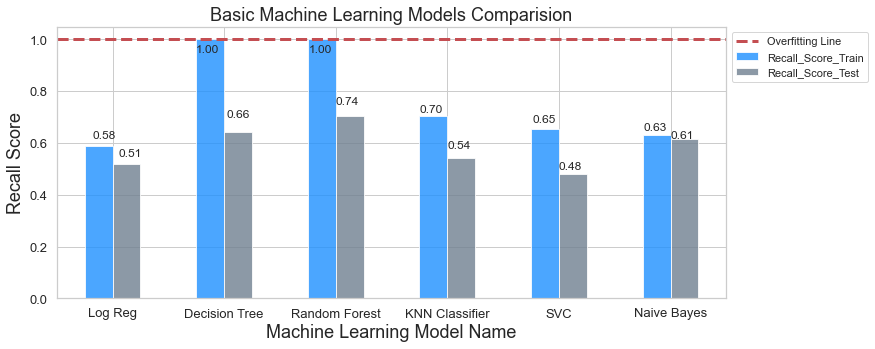

In [37]:
x = results[['Recall_Score_Train','Recall_Score_Test']].plot(kind='bar',
              figsize=(12,5), color=['dodgerblue', 'slategray'], fontsize=13, alpha=0.8);
plt.title("Basic Machine Learning Models Comparision",fontsize=18)
plt.ylabel("Recall Score", fontsize=18)
plt.xlabel('Machine Learning Model Name', fontsize=18)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xticks(rotation=0)
plt.axhline(y=1, label='Overfitting Line',ls='--', lw=3,alpha=1, c='r')
plt.legend(bbox_to_anchor = [1.22, 1])

plt.annotate(text='0.58', xy=(-0.18,0.62), fontsize=12)
plt.annotate(text='0.51', xy=(0.05,0.55), fontsize=12)

plt.annotate(text='1.00', xy=(0.75,0.95), fontsize=12)
plt.annotate(text='0.66', xy=(1.02,0.70), fontsize=12)

plt.annotate(text='1.00', xy=(1.76,0.95), fontsize=12)
plt.annotate(text='0.74', xy=(2.00,0.75), fontsize=12)

plt.annotate(text='0.70', xy=(2.75,0.72), fontsize=12)
plt.annotate(text='0.54', xy=(3.00,0.58), fontsize=12)

plt.annotate(text='0.65', xy=(3.76,0.68), fontsize=12)
plt.annotate(text='0.48', xy=(4.00,0.50), fontsize=12)

plt.annotate(text='0.63', xy=(4.76,0.65), fontsize=12)
plt.annotate(text='0.61', xy=(5,0.62), fontsize=12)
plt.savefig('BASIC MACHINE LEARNING MODELS.png', dpi=150)


- You can see from the above plot that both the tree models are over fitted. 
- classification models gave an accuracy score in range of 70-75%. 
- The models are having poor recall score for test dataset with maximum recall score of **61%** for Naive Bayes Classifier.

### 7.2 Hyper parameter tuning

Now let us try to fine tune these basic models one by one and check if we can improve the recall scores

### Logistic Regression

In [38]:
i=0.40
results_lr={}
while i<=0.70:
    pred_lr=np.where(logreg.predict_proba(X_train)[:,1]>i,1,0)
    pred_lr_test=np.where(logreg.predict_proba(X_test)[:,1]>i,1,0)
    results_lr[i]= [i,recall_score(y_train,pred_lr),recall_score(y_test,pred_lr_test)]
        
    i=i+0.05
results_logreg=pd.DataFrame(data=results_lr.values(), columns=['Probability','Recall_Score_Train','Recall_Score_Test'])
results_logreg

,Probability,Recall_Score_Train,Recall_Score_Test
0,0.40,0.684492,0.654321
1,0.45,0.647059,0.592593
2,0.50,0.588235,0.518519
3,0.55,0.556150,0.481481
4,0.60,0.513369,0.444444
5,0.65,0.486631,0.407407


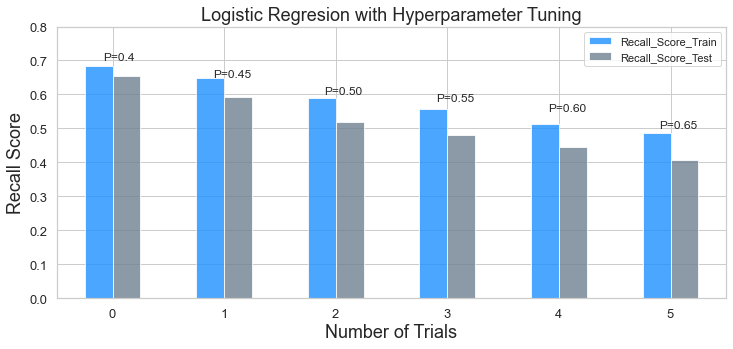

In [39]:
x = results_logreg[['Recall_Score_Train','Recall_Score_Test']].plot(kind='bar',
              figsize=(12,5), color=['dodgerblue', 'slategray'], fontsize=13, alpha=0.8);
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
plt.title("Logistic Regresion with Hyperparameter Tuning",fontsize=18)
plt.ylabel("Recall Score", fontsize=18)
plt.xlabel('Number of Trials', fontsize=18)
plt.annotate(text='P=0.4', xy=(-0.08,0.70), fontsize=12)
plt.annotate(text='P=0.45', xy=(0.90,0.65), fontsize=12)
plt.annotate(text='P=0.50', xy=(1.90,0.60), fontsize=12)
plt.annotate(text='P=0.55', xy=(2.90,0.58), fontsize=12)
plt.annotate(text='P=0.60', xy=(3.90,0.55), fontsize=12)
plt.annotate(text='P=0.65', xy=(4.90,0.50), fontsize=12)
plt.xticks(rotation=0)
plt.legend()

In [40]:
y_pred_logreg_test=np.where(logreg.predict_proba(X_test)[:,1]>0.4,1,0)
y_pred_logreg_train=np.where(logreg.predict_proba(X_train)[:,1]>0.40,1,0)
print('Recall score for train data with probability',0.40,'is :',recall_score(y_train,y_pred_logreg_train))
print('Recall score for test data with probability',0.40,'is :',recall_score(y_test,y_pred_logreg_test))

Recall score for train data with probability 0.4 is : 0.6844919786096256
Recall score for test data with probability 0.4 is : 0.654320987654321


### Decision Tree

In [41]:
from sklearn.model_selection import GridSearchCV



tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,50),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(tree,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

y_pred_train_dt2 = grid_search.predict(X_train)
y_pred_test_dt2 = grid_search.predict(X_test)

print('Recall score for train data from GridSearch Decision Tree is:', recall_score(y_train, y_pred_train_dt2))
print('Recall score for Test data from GridSearch Decision Tree is:', recall_score(y_test, y_pred_test_dt2))

Recall score for train data from GridSearch Decision Tree is: 0.7379679144385026
Recall score for Test data from GridSearch Decision Tree is: 0.7037037037037037


### Random Forest

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [2,5,10,15,20,25,30,35,40,45,50,75,100,150,200],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(forest, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

random_search.fit(X_train, y_train)

y_pred_train_rf2 = random_search.predict(X_train)
y_pred_test_rf2 = random_search.predict(X_test)

print('Recall score for train data form RandomizedSearch Random Forest Model is:', recall_score(y_train, y_pred_train_rf2))
print('Recall score for test data RandomizedSearch Random Forest Model is:', recall_score(y_test, y_pred_test_rf2))

Recall score for train data form RandomizedSearch Random Forest Model is: 0.7272727272727273
Recall score for test data RandomizedSearch Random Forest Model is: 0.6666666666666666


In [43]:
print(random_search.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=None,
                       min_samples_leaf=7, min_samples_split=10,
                       n_estimators=15)


### K Nearest Neighbor

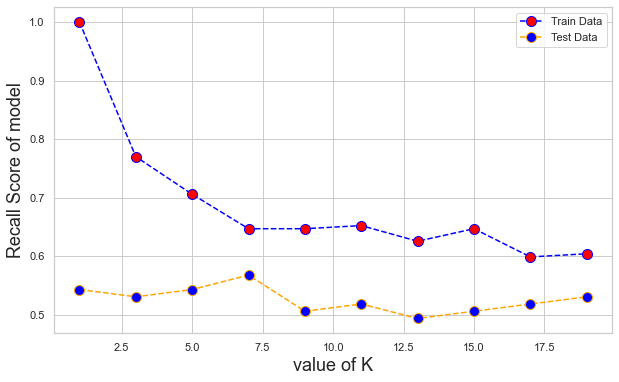

In [44]:
recall_list_train = {}
recall_list_test = {}

for i in range(1,20,2):
    knn_model_ = KNeighborsClassifier(n_neighbors = i,metric='minkowski')
    knn_model_.fit(X_train, y_train)
    pred_i_train = knn_model_.predict(X_train)
    recall_list_train[i]=[recall_score(y_train, pred_i_train)]
    pred_i_test=knn_model_.predict(X_test)
    recall_list_test[i]=[recall_score(y_test, pred_i_test)]
    
plt.figure(figsize=(10,6))
plt.plot(recall_list_train.keys(),recall_list_train.values(),color='blue',linestyle='dashed',marker='o', markerfacecolor='red', 
         markersize='10', label='Train Data')
plt.plot(recall_list_test.keys(),recall_list_test.values(),color='orange',linestyle='dashed',marker='o', markerfacecolor='blue', 
         markersize='10', label='Test Data')
plt.xlabel('value of K', fontsize=18)
plt.ylabel('Recall Score of model', fontsize=18)
plt.legend()
plt.show()


In [45]:
print("Recall score for train dataset: ", recall_list_train[3][0])
print("Recall score for test dataset: ", recall_list_test[3][0])

Recall score for train dataset:  0.7700534759358288
Recall score for test dataset:  0.5308641975308642


### Support Vector Classifier

In [46]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001,], 
              'kernel': ['rbf'],
             'degree':[1,2,3]}  
  
grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
print(grid.best_estimator_) 

y_grid_predictions_train = grid.predict(X_train) 
y_grid_predictions_test = grid.predict(X_test) 

print("Recall score for train dataset: ", recall_score(y_train,y_grid_predictions_train))
print("Recall score for test dataset: ", recall_score(y_test,y_grid_predictions_test))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, degree=1, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=1, gamma=1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, degree=1, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=1, gamma=1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, degree=1, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=1, gamma=1, kernel=rbf, score=0.654, total=   0.0s
[CV] C=0.1, degree=1, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=1, gamma=1, kernel=rbf, score=0.654, total=   0.0s
[CV] C=0.1, degree=1, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=1, gamma=1, kernel=rbf, score=0.654, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.796, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  C=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.776, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.757, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.738, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=1, gamma=0.01, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=1, gamma=0.01, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=1, gamma=0.01, kernel=rbf, score=0.654, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=1, gamma=0.01, kernel=rbf, score=0.654, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.01, kernel=rbf .............

[CV] C=1, degree=1, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=1, gamma=0.1, kernel=rbf, score=0.778, total=   0.0s
[CV] C=1, degree=1, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=1, gamma=0.1, kernel=rbf, score=0.785, total=   0.0s
[CV] C=1, degree=1, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=1, gamma=0.1, kernel=rbf, score=0.766, total=   0.0s
[CV] C=1, degree=1, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=1, gamma=0.1, kernel=rbf, score=0.748, total=   0.0s
[CV] C=1, degree=1, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=1, gamma=0.01, kernel=rbf, score=0.759, total=   0.0s
[CV] C=1, degree=1, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=1, gamma=0.01, kernel=rbf, score=0.806, total=   0.0s
[CV] C=1, degree=1, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=1, gamma=0.01, kernel=rbf, score=0.794, total=   0.0s
[CV

[CV]  C=10, degree=1, gamma=0.1, kernel=rbf, score=0.757, total=   0.0s
[CV] C=10, degree=1, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=1, gamma=0.1, kernel=rbf, score=0.748, total=   0.0s
[CV] C=10, degree=1, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=1, gamma=0.1, kernel=rbf, score=0.748, total=   0.0s
[CV] C=10, degree=1, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=1, gamma=0.01, kernel=rbf, score=0.806, total=   0.0s
[CV] C=10, degree=1, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=1, gamma=0.01, kernel=rbf, score=0.796, total=   0.0s
[CV] C=10, degree=1, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=1, gamma=0.01, kernel=rbf, score=0.794, total=   0.0s
[CV] C=10, degree=1, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=1, gamma=0.01, kernel=rbf, score=0.776, total=   0.0s
[CV] C=10, degree=1, gamma=0.01, kernel=rbf ......................

[CV]  C=100, degree=1, gamma=1, kernel=rbf, score=0.692, total=   0.0s
[CV] C=100, degree=1, gamma=0.1, kernel=rbf ..........................
[CV]  C=100, degree=1, gamma=0.1, kernel=rbf, score=0.667, total=   0.1s
[CV] C=100, degree=1, gamma=0.1, kernel=rbf ..........................
[CV]  C=100, degree=1, gamma=0.1, kernel=rbf, score=0.657, total=   0.1s
[CV] C=100, degree=1, gamma=0.1, kernel=rbf ..........................
[CV]  C=100, degree=1, gamma=0.1, kernel=rbf, score=0.748, total=   0.1s
[CV] C=100, degree=1, gamma=0.1, kernel=rbf ..........................
[CV]  C=100, degree=1, gamma=0.1, kernel=rbf, score=0.673, total=   0.1s
[CV] C=100, degree=1, gamma=0.1, kernel=rbf ..........................
[CV]  C=100, degree=1, gamma=0.1, kernel=rbf, score=0.692, total=   0.0s
[CV] C=100, degree=1, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=1, gamma=0.01, kernel=rbf, score=0.741, total=   0.0s
[CV] C=100, degree=1, gamma=0.01, kernel=rbf ...................

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    6.2s finished


### Naive Bayes Classifier

In [47]:
i=0.35
results_nb={}
while i<=0.95:
    y_pred_nb_train=np.where(nb.predict_proba(X_train)[:,1]>i,1,0)
    y_pred_nb_test=np.where(nb.predict_proba(X_test)[:,1]>i,1,0)
    results_nb[i]= [i,recall_score(y_train,y_pred_nb_train),recall_score(y_test,y_pred_nb_test)]
        
    i=i+0.05
result_nb=pd.DataFrame(data=results_nb.values(), columns=['Probability','Recall_Score_Train','Recall_Score_test'])
result_nb

,Probability,Recall_Score_Train,Recall_Score_test
0,0.35,0.716578,0.641975
1,0.40,0.657754,0.629630
2,0.45,0.641711,0.617284
3,0.50,0.631016,0.617284
4,0.55,0.598930,0.592593
5,0.60,0.588235,0.567901
6,0.65,0.561497,0.543210
7,0.70,0.524064,0.518519
8,0.75,0.465241,0.481481
9,0.80,0.438503,0.456790


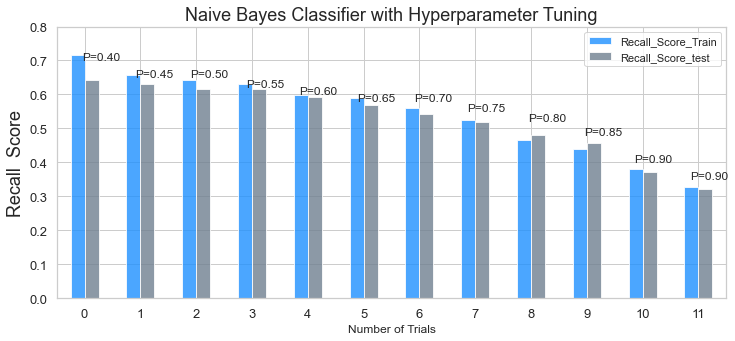

In [48]:
x = result_nb[['Recall_Score_Train','Recall_Score_test']].plot(kind='bar',
              figsize=(12,5), color=['dodgerblue', 'slategray'], fontsize=13, alpha = 0.8);
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
plt.title("Naive Bayes Classifier with Hyperparameter Tuning",fontsize=18)
plt.ylabel("Recall  Score", fontsize=18)
plt.xlabel('Number of Trials')
plt.annotate(text='P=0.40', xy=(-0.05,0.70), fontsize=12)
plt.annotate(text='P=0.45', xy=(0.90,0.65), fontsize=12)
plt.annotate(text='P=0.50', xy=(1.90,0.65), fontsize=12)
plt.annotate(text='P=0.55', xy=(2.90,0.62), fontsize=12)
plt.annotate(text='P=0.60', xy=(3.85,0.60), fontsize=12)
plt.annotate(text='P=0.65', xy=(4.88,0.58), fontsize=12)
plt.annotate(text='P=0.70', xy=(5.90,0.58), fontsize=12)
plt.annotate(text='P=0.75', xy=(6.85,0.55), fontsize=12)
plt.annotate(text='P=0.80', xy=(7.95,0.52), fontsize=12)
plt.annotate(text='P=0.85', xy=(8.95,0.48), fontsize=12)
plt.annotate(text='P=0.90', xy=(9.85,0.40), fontsize=12)
plt.annotate(text='P=0.90', xy=(10.85,0.35), fontsize=12)
plt.xticks(rotation=0)
plt.legend()

In [49]:
y_pred_nb_test=np.where(nb.predict_proba(X_test)[:,1]>0.35,1,0)
y_pred_nb_train=np.where(nb.predict_proba(X_train)[:,1]>0.35,1,0)
print('Recall score for test data with probability',0.35,'is :',recall_score(y_test,y_pred_nb_test))
print('Recall score for train data with probability',0.35,'is :',recall_score(y_train,y_pred_nb_train))

Recall score for test data with probability 0.35 is : 0.6419753086419753
Recall score for train data with probability 0.35 is : 0.7165775401069518


### Summary

In [50]:
hyper_dict={}
hyper_dict['Logit']=[recall_score(y_train,y_pred_logreg_train), recall_score(y_test, y_pred_logreg_test)]
hyper_dict['Decision Tree']=[recall_score(y_train, y_pred_train_dt2),recall_score(y_test, y_pred_test_dt2)]
hyper_dict['Random_Forest']=[recall_score(y_train, y_pred_train_rf2), recall_score(y_test, y_pred_test_rf2)]
hyper_dict['KNN Classifier']=[recall_list_train[3][0],recall_list_test[3][0]]
hyper_dict['SVC']=[recall_score(y_train,y_grid_predictions_train),recall_score(y_test,y_grid_predictions_test)]
hyper_dict['Naive Bayes']=[recall_score(y_test,y_pred_nb_test),recall_score(y_train,y_pred_nb_train)]

In [51]:
hyper=pd.DataFrame(data=hyper_dict.values(),columns=['Recall_Score_Train','Recall_Score_Test'], index=hyper_dict.keys())
hyper

,Recall_Score_Train,Recall_Score_Test
Logit,0.684492,0.654321
Decision Tree,0.737968,0.703704
Random_Forest,0.727273,0.666667
KNN Classifier,0.770053,0.530864
SVC,0.598930,0.456790
Naive Bayes,0.641975,0.716578


Text(5.01, 0.73, '0.71')

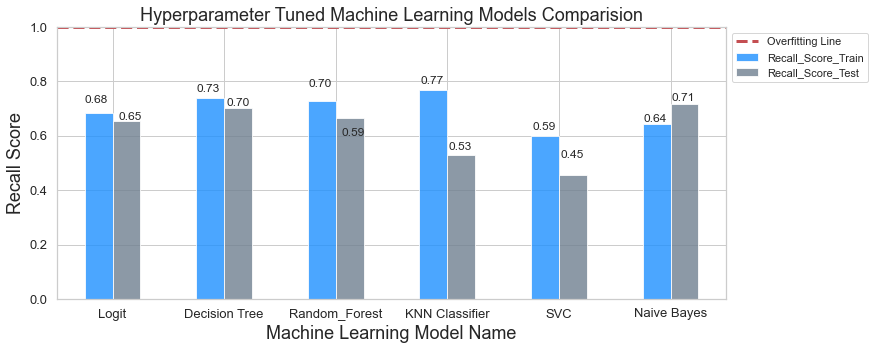

In [52]:
x = hyper[['Recall_Score_Train','Recall_Score_Test']].plot(kind='bar',
              figsize=(12,5), color=['dodgerblue', 'slategray'], fontsize=13, alpha=0.8);
plt.title("Hyperparameter Tuned Machine Learning Models Comparision",fontsize=18)
plt.ylabel("Recall Score", fontsize=18)
plt.xlabel('Machine Learning Model Name', fontsize=18)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xticks(rotation=0)
plt.axhline(y=1, label='Overfitting Line',ls='--', lw=3,alpha=1, c='r')
plt.legend(bbox_to_anchor = [1.22, 1])

plt.annotate(text='0.68', xy=(-0.25,0.72), fontsize=12)
plt.annotate(text='0.65', xy=(0.05,0.66), fontsize=12)

plt.annotate(text='0.73', xy=(0.75,0.76), fontsize=12)
plt.annotate(text='0.70', xy=(1.02,0.71), fontsize=12)

plt.annotate(text='0.70', xy=(1.76,0.78), fontsize=12)
plt.annotate(text='0.59', xy=(2.05,0.60), fontsize=12)

plt.annotate(text='0.77', xy=(2.76,0.79), fontsize=12)
plt.annotate(text='0.53', xy=(3.01,0.55), fontsize=12)

plt.annotate(text='0.59', xy=(3.76,0.62), fontsize=12)
plt.annotate(text='0.45', xy=(4.01,0.52), fontsize=12)

plt.annotate(text='0.64', xy=(4.76,0.65), fontsize=12)
plt.annotate(text='0.71', xy=(5.01,0.73), fontsize=12)

From the above plot we can see that none of the models with hyperparameter tuning gave batter results. Although we have noticed better results for Train dataset, the results for test dataset is very poor.

### 7.3 Linear Discriminant Analysis (LDA)

Now let us apply LDA techniques and reduce the dimensionality of the dataset and check if we can get better results.

![figure-1](https://i.stack.imgur.com/9k7iT.png)

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_0 = LDA()
lda_0.fit(X_train, y_train)
y_train_pred_lda = lda_0.predict(X_train)
y_test_pred_lda = lda_0.predict(X_test)

print("Recall score for train dataset: ", recall_score(y_train,y_train_pred_lda))
print("Recall score for test dataset: ", recall_score(y_test,y_test_pred_lda))

Recall score for train dataset:  0.5935828877005348
Recall score for test dataset:  0.5185185185185185


The Recall score from LDA Classifier is bad as expected. Let us try combination of LDA + other classification model and check the recall score. Here we will use LDA as a method to reduce the dimesnion of the data. 

### LDA + Logistic Regression 

In [54]:
lda = LDA(n_components = 1)
X_train_1 = lda.fit_transform(X_train, y_train)
X_test_1 = lda.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() #euc method
fit1 = classifier.fit(X_train_1, y_train)

y_pred_train_LDA_logreg = fit1.predict(X_train_1)
y_pred_test_LDA_logreg = fit1.predict(X_test_1)

print("Recall score for train dataset: ", recall_score(y_train,y_pred_train_LDA_logreg))
print("Recall score for test dataset: ", recall_score(y_test,y_pred_test_LDA_logreg))

Recall score for train dataset:  0.5935828877005348
Recall score for test dataset:  0.5185185185185185


### LDA + KNN

In [55]:
from sklearn.metrics import recall_score
recall_list_train = {}
recall_list_test={}
for i in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_1,y_train)
    pred_y_train = knn.predict(X_train_1)
    recall_list_train[i]=[round(recall_score(pred_y_train, y_train),2)]
    pred_y_test = knn.predict(X_test_1)
    recall_list_test[i]=[round(recall_score(pred_y_test, y_test),2)]

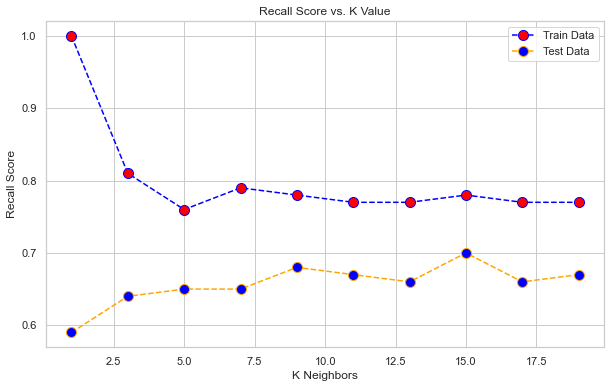

In [56]:
plt.figure(figsize=(10,6))
plt.plot(recall_list_train.keys(),recall_list_train.values(),color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label='Train Data')
plt.plot(recall_list_test.keys(),recall_list_test.values(),color='orange', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10, label='Test Data')
plt.title('Recall Score vs. K Value')
plt.xlabel('K Neighbors')
plt.ylabel('Recall Score')
plt.legend()

In [57]:
print("Recall score for train dataset: ", recall_list_train[3][0])
print("Recall score for test dataset: ", recall_list_test[3][0])

Recall score for train dataset:  0.81
Recall score for test dataset:  0.64


### LDA + SVM

In [58]:
from sklearn.svm import SVC
model_SVC = SVC(C=100,kernel = 'rbf')
model_SVC.fit(X_train_1,y_train)

y_pred_train_LDA_svc = model_SVC.predict(X_train_1)
y_pred_test_LDA_svc = model_SVC.predict(X_test_1)

print("Recall score for train dataset: ", recall_score(y_train,y_pred_train_LDA_svc))
print("Recall score for test dataset: ", recall_score(y_test,y_pred_test_LDA_svc))

Recall score for train dataset:  0.5614973262032086
Recall score for test dataset:  0.4691358024691358


### LDA + Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier as DTC
dt = DTC()
tree = dt.fit(X_train_1,y_train)

y_pred_train_LDA_dt = tree.predict(X_train_1)
y_pred_test_LDA_dt = tree.predict(X_test_1)

print("Recall score for train dataset: ", recall_score(y_train,y_pred_train_LDA_dt))
print("Recall score for test dataset: ", recall_score(y_test,y_pred_test_LDA_dt))

Recall score for train dataset:  1.0
Recall score for test dataset:  0.6296296296296297


### LDA + Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier  as RFC
rfc = RFC()
rf = rfc.fit(X_train_1,y_train)

y_pred_train_LDA_rf = rf.predict(X_train_1)
y_pred_test_LDA_rf = rf.predict(X_test_1)

print("Recall score for train dataset: ", recall_score(y_train,y_pred_train_LDA_rf))
print("Recall score for test dataset: ", recall_score(y_test,y_pred_test_LDA_rf))

Recall score for train dataset:  1.0
Recall score for test dataset:  0.6296296296296297


### Summary from LDA

In [61]:
lda={}
lda['LDA']=[recall_score(y_train,y_train_pred_lda),recall_score(y_test,y_test_pred_lda)]
lda['LDA + Logit']=[recall_score(y_train,y_pred_train_LDA_logreg),recall_score(y_test,y_pred_test_LDA_logreg)]
lda['LDA + KNN']=[recall_list_train[3][0],recall_list_test[3][0]]
lda['LDA + SVM']=[recall_score(y_train,y_pred_train_LDA_svc),recall_score(y_test,y_pred_test_LDA_svc)]
lda['LDA + DT']=[recall_score(y_train,y_pred_train_LDA_dt),recall_score(y_test,y_pred_test_LDA_dt)]
lda['LDA + RF'] =[recall_score(y_train,y_pred_train_LDA_rf),recall_score(y_test,y_pred_test_LDA_rf)]

In [62]:
LDA=pd.DataFrame(data=lda.values(),columns=['Recall_Score_Train','Recall_Score_Test'], index=lda.keys())
LDA

,Recall_Score_Train,Recall_Score_Test
LDA,0.593583,0.518519
LDA + Logit,0.593583,0.518519
LDA + KNN,0.810000,0.640000
LDA + SVM,0.561497,0.469136
LDA + DT,1.000000,0.629630
LDA + RF,1.000000,0.629630


Text(5.02, 0.63, '0.59')

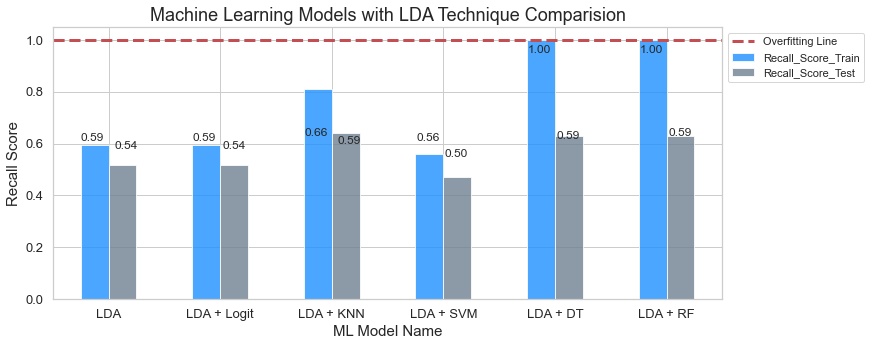

In [63]:
x = LDA[['Recall_Score_Train','Recall_Score_Test']].plot(kind='bar',figsize=(12,5), color=['dodgerblue', 'slategray'], fontsize=13, alpha=0.8);

plt.title("Machine Learning Models with LDA Technique Comparision",fontsize=18)
plt.ylabel("Recall Score", fontsize=15)
plt.xlabel('ML Model Name', fontsize=15)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xticks(rotation=0)
plt.axhline(y=1, label='Overfitting Line',ls='--', lw=3,alpha=1, c='r')
plt.legend(bbox_to_anchor = [1.22, 1])

plt.annotate(text='0.59', xy=(-0.25,0.61), fontsize=12)
plt.annotate(text='0.54', xy=(0.05,0.58), fontsize=12)

plt.annotate(text='0.59', xy=(0.75,0.61), fontsize=12)
plt.annotate(text='0.54', xy=(1.02,0.58), fontsize=12)

plt.annotate(text='0.66', xy=(1.76,0.63), fontsize=12)
plt.annotate(text='0.59', xy=(2.05,0.60), fontsize=12)

plt.annotate(text='0.56', xy=(2.76,0.61), fontsize=12)
plt.annotate(text='0.50', xy=(3.01,0.55), fontsize=12)

plt.annotate(text='1.00', xy=(3.76,0.95), fontsize=12)
plt.annotate(text='0.59', xy=(4.01,0.62), fontsize=12)

plt.annotate(text='1.00', xy=(4.76,0.95), fontsize=12)
plt.annotate(text='0.59', xy=(5.02,0.63), fontsize=12)

We can notice from the above summary plot that neither LDA or LDA+ Classification algorithm gave any better results than earlier. Therefore LDA is not the right choice for this dataset. 

## 8. Ensemble Techniques

Since we have failed to develop good ML model from Basic, Hyperparameter tuning and also from LDA techniques, Now the only option left is to **Ensemble Concepts and Boost the Algorithms**.

### 8.1 Applying Bagging Classifier

![5 Easy Questions on Ensemble Modeling everyone should know](https://www.analyticsvidhya.com/wp-content/uploads/2015/09/bagging.png)

#### 8.1.1 Bagging Classifier

In [64]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=200, max_samples=60, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred_train = bag_clf.predict(X_train)
y_pred_test = bag_clf.predict(X_test)
print("Recall Score of Bagging classifier for train data is {0}".format(recall_score(y_train, y_pred_train)))
print("Recall Score of Bagging classifier for test data is {0}".format(recall_score(y_test, y_pred_test)))

Recall Score of Bagging classifier for train data is 0.7005347593582888
Recall Score of Bagging classifier for test data is 0.6049382716049383


Checking for saturation.

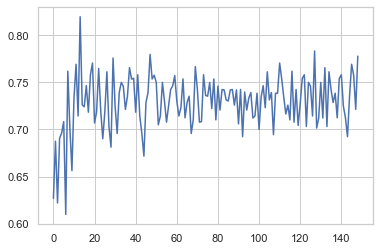

In [65]:
rec_score=[]
for est in range(1,150):
    bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=est, max_samples=60, bootstrap=True, n_jobs=-1)
    bag_clf.fit(X_train, y_train)
    y_pred = bag_clf.predict(X_test)
    rec_score.append(recall_score(y_pred, y_test))
var=np.arange(1,100)
plt.plot(rec_score)


#### 8.1.2 Voting Classifier

![](https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-08-at-4.17.30-PM.png)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

log_clf = LogisticRegression()
dtc=DecisionTreeClassifier()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
gnb=GaussianNB()
lda=LDA()
estimators=[('lr', log_clf), ('dtc',dtc),('rf', rnd_clf),('svc', svm_clf), ('gnb',gnb),('lda',lda)]
# here we are using hard voting
voting_clf = VotingClassifier(estimators=estimators,voting='hard')
voting_clf.fit(X_train, y_train)


for clf in (log_clf, dtc, rnd_clf, svm_clf, gnb,lda, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'Recall Score is',recall_score(y_test, y_pred))
    
y_voting_train=voting_clf.predict(X_train)
y_voting_test=voting_clf.predict(X_test)

print('\n')

print("Recall Score of Voting classifier for train data is {0}".format(recall_score(y_train, y_voting_train)))
print("Recall Score of Voting classifier for test data is {0}".format(recall_score(y_test, y_voting_test)))

LogisticRegression Recall Score is 0.5185185185185185
DecisionTreeClassifier Recall Score is 0.6666666666666666
RandomForestClassifier Recall Score is 0.7283950617283951
SVC Recall Score is 0.48148148148148145
GaussianNB Recall Score is 0.6172839506172839
LinearDiscriminantAnalysis Recall Score is 0.5185185185185185
VotingClassifier Recall Score is 0.5185185185185185


Recall Score of Voting classifier for train data is 0.6363636363636364
Recall Score of Voting classifier for test data is 0.5185185185185185


### 8.2 Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
gradient={}
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    y_train_pred_gb=gb_clf.predict(X_train)
    y_test_pred_gb=gb_clf.predict(X_test)
    gradient[learning_rate]=[round(recall_score(y_train, y_train_pred_gb),2),round(recall_score(y_test, y_test_pred_gb),2)]

In [68]:
gdr=pd.DataFrame(data=gradient.values(), index=gradient.keys(), columns=['Recall_Train', 'Recall_test'])
gdr

,Recall_Train,Recall_test
0.050,0.44,0.40
0.075,0.54,0.46
0.100,0.62,0.53
0.250,0.74,0.67
0.500,0.78,0.65
0.750,0.81,0.68
1.000,0.84,0.69


### 8.3 XG Boost Classifier

In [69]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

y_train_pred_xg=xgb_clf.predict(X_train)
y_test_pred_xg=xgb_clf.predict(X_test)

print("Recall score for train dataset is", recall_score(y_train, y_train_pred_xg))
print("Recall score for test dataset",recall_score(y_test, y_test_pred_xg))


Recall score for train dataset is 1.0
Recall score for test dataset 0.7407407407407407


As expected XG Boost got overfitted...!

### 8.4 Adaboost Classifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
ada={}
for learning_rate in lr_list:
    ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=learning_rate, random_state=0)
    ada_clf.fit(X_train, y_train)
    y_train_pred_ad=ada_clf.predict(X_train)
    y_test_pred_ad=ada_clf.predict(X_test)
    ada[learning_rate]=[round(recall_score(y_train, y_train_pred_ad),2),round(recall_score(y_test, y_test_pred_ad),2)]

In [71]:
adc=pd.DataFrame(data=ada.values(), index=ada.keys(), columns=['Recall_Train', 'Recall_test'])
adc

,Recall_Train,Recall_test
0.050,0.50,0.46
0.075,0.53,0.51
0.100,0.61,0.56
0.250,0.72,0.70
0.500,0.77,0.73
0.750,0.79,0.70
1.000,0.80,0.68


In [72]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_train_ada = model.predict(X_train)
y_pred_test_ada = model.predict(X_test)

print("Recall score for train dataset is", recall_score(y_train, y_pred_train_ada))
print("Recall score for test dataset",recall_score(y_test, y_pred_test_ada))

Recall score for train dataset is 0.8021390374331551
Recall score for test dataset 0.6790123456790124


## 9 Stacking

![](https://www.researchgate.net/profile/Junpeng_Zhang3/publication/335156833/figure/fig1/AS:791606114385920@1565745013555/The-architecture-of-the-stacking-ensemble-learning-In-the-base-classifiers-the-training.ppm)

In [73]:
from xgboost import XGBClassifier
from vecstack import stacking


models = [KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
         RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3),
         XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3)]
S_train, S_test = stacking(models,
                           X_train,
                           y_train,
                           X_test,
                           regression=False,
                           mode='oof_pred_bag',
                           needs_proba=False,
                           save_dir=None,
                           metric=accuracy_score,
                           n_folds=4,
                           stratified=True,
                           shuffle=True,
                           random_state=0,
                           verbose=2)
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,n_estimators=100, max_depth=3)
model = model.fit(S_train, y_train)

y_pred_train_stacking = model.predict(S_train)
y_pred_test_stacking= model.predict(S_test)

print("Recall Score for train dataset is:",recall_score(y_train, y_pred_train_stacking))
print("Recall Score for test dataset is :",recall_score(y_test, y_pred_test_stacking))


task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.74814815]
    fold  1:  [0.76865672]
    fold  2:  [0.78358209]
    fold  3:  [0.70895522]
    ----
    MEAN:     [0.75233554] + [0.02802728]
    FULL:     [0.75232775]

model  1:     [RandomForestClassifier]
    fold  0:  [0.79259259]
    fold  1:  [0.79850746]
    fold  2:  [0.83582090]
    fold  3:  [0.79104478]
    ----
    MEAN:     [0.80449143] + [0.01830122]
    FULL:     [0.80446927]

model  2:     [XGBClassifier]
    fold  0:  [0.84444444]
    fold  1:  [0.85074627]
    fold  2:  [0.86567164]
    fold  3:  [0.79850746]
    ----
    MEAN:     [0.83984245] + [0.02507888]
    FULL:     [0.83985102]

Recall Score for train dataset is: 0.7219251336898396
Recall Score for test dataset is : 0.7160493827160493


## Summary

In [74]:
ens={}
ens['Bagging Classifier']=[round(recall_score(y_train, y_pred_train),2),round(recall_score(y_test, y_pred_test),2)]
ens['Voting Classifier']=[round(recall_score(y_train, y_voting_train),2),round(recall_score(y_test, y_voting_test),2)]
ens['XG Boost Classifier']=[round(recall_score(y_train, y_train_pred_xg),2),round(recall_score(y_test, y_test_pred_xg),2)]
ens['Adaboost Classifier']=[round(recall_score(y_train, y_pred_train_ada),2),round(recall_score(y_test, y_pred_test_ada),2)]
ens['Stacking']=[round(recall_score(y_train, y_pred_train_stacking),2),round(recall_score(y_test, y_pred_test_stacking),2)]

In [75]:
Ensemble=pd.DataFrame(data=ens.values(), columns=['Recall_Score_Train','Recall_Score_Test'], index=ens.keys())

In [76]:
Ensemble

,Recall_Score_Train,Recall_Score_Test
Bagging Classifier,0.70,0.60
Voting Classifier,0.64,0.52
XG Boost Classifier,1.00,0.74
Adaboost Classifier,0.80,0.68
Stacking,0.72,0.72


Text(4.02, 0.73, '0.72')

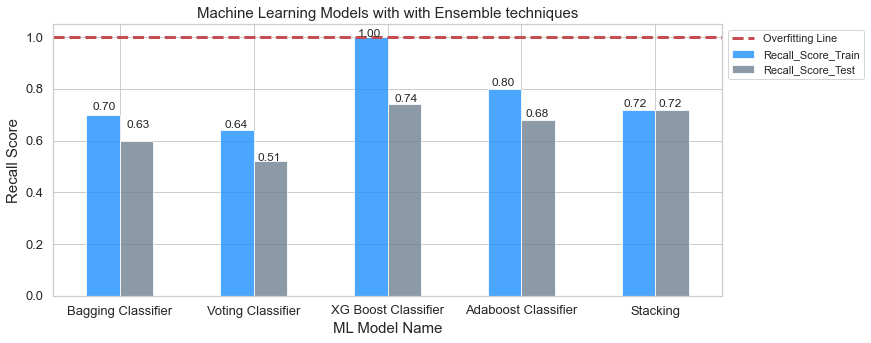

In [77]:
x = Ensemble[['Recall_Score_Train','Recall_Score_Test']].plot(kind='bar',figsize=(12,5), color=['dodgerblue', 'slategray'], fontsize=13, alpha=0.8);

plt.title("Machine Learning Models with with Ensemble techniques", fontsize=15)
plt.ylabel("Recall Score", fontsize=15)
plt.xlabel('ML Model Name', fontsize=15)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xticks(rotation=0)
plt.axhline(y=1, label='Overfitting Line',ls='--', lw=3,alpha=1, c='r')
plt.legend(bbox_to_anchor = [1.22, 1])

plt.annotate(text='0.70',xy=(-0.20,0.72),fontsize=12)
plt.annotate(text='0.63',xy=(0.05,0.65), fontsize=12)

plt.annotate(text='0.64',xy=(0.78,0.65), fontsize=12)
plt.annotate(text='0.51',xy=(1.03,0.52),fontsize=12)

plt.annotate(text='1.00',xy=(1.78,1.00), fontsize=12)
plt.annotate(text='0.74',xy=(2.05,0.75), fontsize=12)

plt.annotate(text='0.80', xy=(2.78,0.81), fontsize=12)
plt.annotate(text='0.68',xy=(3.03,0.69), fontsize=12)

plt.annotate(text='0.72', xy=(3.76,0.73),fontsize=12)
plt.annotate(text='0.72', xy=(4.02,0.73),fontsize=12)

Finally we can see after the above comparision between various Ensemble techniques that **Stacking Classifier** have the best performance of 72% for both train as well as for test dataset.

Although other ensemble techniques gave better results than Stacking, their performance with test data is comparatively low. Therefore Stacking is the best Classifer for this dataset. We have developed the Stacking Classifier on top of KNN, Random Forest and XG Boost Classifiers.

The Confusion Matrix, Accuracy, Precision Score and Recall Socre of Stacking Classifier is as follows

The Accuracy score for test data for Stacking Classifier is : 0.8441558441558441


The Recall score for test data for Stacking Classifier is : 0.7160493827160493


The Pricision score for test data for Stacking Classifier is : 0.8169014084507042


AxesSubplot(0.125,0.125;0.62x0.755)


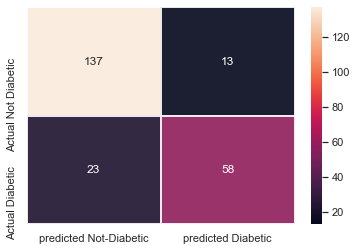

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

print('The Accuracy score for test data for Stacking Classifier is :', accuracy_score(y_test, y_pred_test_stacking))
print('\n')
print('The Recall score for test data for Stacking Classifier is :', recall_score(y_test, y_pred_test_stacking))
print('\n')
print('The Pricision score for test data for Stacking Classifier is :', precision_score(y_test, y_pred_test_stacking))
print('\n')

      
confusion_matrix=pd.DataFrame(confusion_matrix(y_test, y_pred_test_stacking))
confusion_matrix.index=['Actual Not Diabetic','Actual Diabetic']
confusion_matrix.columns=['predicted Not-Diabetic','predicted Diabetic']
print(sns.heatmap(confusion_matrix,linewidths=1,linecolor='white', annot=True,fmt='.3g',alpha=0.9))